[0.26716933 0.34045242 0.41373552 0.48701861 0.5603017  0.6335848
 0.70686789 0.78015098 0.85343408 0.92671717 1.00000026]
[0.26716933 0.34045242 0.41373552 0.48701861 0.5603017  0.6335848
 0.70686789 0.78015098 0.85343408 0.92671717 1.00000026]
[0.26716933 0.34045242 0.41373552 0.48701861 0.5603017  0.6335848
 0.70686789 0.78015098 0.85343408 0.92671717 1.00000026]
[0.26716933 0.34045242 0.41373552 0.48701861 0.5603017  0.6335848
 0.70686789 0.78015098 0.85343408 0.92671717 1.00000026]
[0.30888378 0.3822475  0.45195608 0.52707713 0.59542381 0.66895217
 0.74378915 0.8193527  0.89330562 0.98531986]
(4, 5000)
(4, 5000)
[0.51637273 0.57463624 0.63851849 0.67858995 0.72022761 0.76331692
 0.80624898 0.84552264 0.87880351 0.91566057]
[0.53460614 0.59212799 0.64777382 0.68659944 0.7284304  0.76811903
 0.8073823  0.84499245 0.87742271 0.91380997]
[0.54680686 0.60098209 0.65470103 0.69203243 0.73246543 0.7697239
 0.80837332 0.84524077 0.87712131 0.91120731]
[0.55442592 0.61214042 0.66023321 0.6

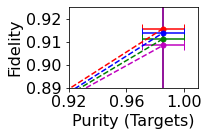

In [2]:
import sys
sys.path.insert(0, '../utils')
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
import Fidelity_Measure as fm
import Purity_Measure as pm
import Concurrence_Measure as cm
import os

from scipy import stats

# tomo_test, dm_test, dm_mle = pd.read_pickle(f'../../../../IBMQ/test_data/testdata_qubit_size_2.pkl')
# con_test = cm.concurrence(dm_mle)
# pur_test = pm.purity(dm_mle)
#
#
# fids_mle, fids_av_mle, dm_target, rho_fit_array_mle = pd.read_pickle('../../../mle_outputs/convoluted_mle_fids_list_fids_mean_shots_1024_n_size_500.pickle')
#
# # pur_mle = pm.purity(rho_fit_array_mle)
# # con_mle = cm.concurrence(rho_fit_array_mle)
# mle_m = np.array(fids_av_mle)
# mle_std = np.std(fids_mle)
# mle_mean = np.repeat(mle_m, 5)
# print(mle_mean)
# mle_std = np.repeat(mle_std, 5)
# print(mle_std)

# test_data_path = '../data'
tomo_test_data_file = f'../data/MA_tomo_tau_dm_5000_qs_4_alpha_TEST_0.015.pickle'
# corr_test_data_file = test_data_path + f'/corrected_testdata_qubit_size_2.pkl'
x_test, tau, dm_mle_uncorrected = pd.read_pickle(tomo_test_data_file)


kparams_values = ['16_no_truncation', '19_no_truncation', '22_no_truncation', '25_no_truncation']
K = [16, 19 , 22, 25]
fidelity_list, fidelity_av, dms, pur_list, params_list = pd.read_pickle("../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_0.015_k_params_['16_no_truncation', '19_no_truncation', '22_no_truncation', '25_no_truncation']_qs_4.pickle")

fid_nn = np.array(fidelity_list).reshape(4, 10, -1)
# fid_nn = np.array(fidelity_list).reshape(4, -1)
fid_nn_unfit = fid_nn[:5]
fid_nn_unfit_m = np.mean(fid_nn_unfit, axis=1)
# print(fid_nn_unfit_m)
# fid_nn_unfit_std = np.std(np.std(fid_nn_unfit, axis=1), axis=1)
# fid_nn_fit = fid_nn[5:]
# fid_nn_fit_m = np.mean(fid_nn_fit, axis=1)
# fid_nn_fit_std = np.std(fid_nn_fit, axis=1)

# con_nn = np.array(cm_list).reshape(4, 10, -1).mean(axis=1)
# con_nn = np.array(cm_list).reshape(4, -1).mean(axis=1)
pur_nn = np.array(pur_list).reshape(4, 10, -1).mean(axis=1)
# pur_nn = np.array(pur_list).reshape(4, -1).mean(axis=1)


test_pur = pm.purity(dm_mle_uncorrected)

# print(test_pur.shape)

means = []
stds = []
n_bins = 10
# bins_edges = np.arange(n_bins)
for i in range(len(kparams_values)):
    mean_values, bin_edges, _ = stats.binned_statistic(test_pur, fid_nn_unfit_m[i], statistic='mean', bins=n_bins)
    print(bin_edges)
    std_values, bin_edges, _ = stats.binned_statistic(test_pur, fid_nn_unfit_m[i], statistic='std', bins=n_bins)
    means.append(mean_values)
    stds.append(std_values)
bin_means, bin_edges, _ = stats.binned_statistic(test_pur, test_pur, statistic='mean', bins=n_bins)
bin_stds, bin_edges, _ = stats.binned_statistic(test_pur, test_pur, statistic='std', bins=n_bins)

bin_stds = np.where(bin_means+bin_stds>1, 1 - bin_means, bin_stds)
# bins_mean = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(10)]
# bins_range = [(bin_edges[i+1] - bin_edges[i]) for i in range(10)]
# print(bins_mean)
# print(mean_values)
# print(std_values)
# print(bin_edges)
print(bin_means)


print (fid_nn_unfit_m.shape)
print(pur_nn.shape)

# plt.hist(values, bins=bin_edges)
colors = ['r', 'b', 'g', 'm']

for i in range(len(kparams_values)):
    print(means[i])
    plt.errorbar(bin_means, means[i], yerr=stds[i], xerr=bin_stds, fmt=f'--{colors[i]}o', ecolor=f'{colors[i]}',
                 elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
                 xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=f'K = {kparams_values[i][:2]}')

# plt.errorbar(K, fid_nn_fit_m, yerr=fid_nn_fit_std, xerr=None, fmt='-ro', ecolor='r',
#              elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
#              xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='Fitted (NN)')


# plt.errorbar(K, fid_nn_unfit_m, yerr=fid_nn_unfit_std, xerr=None, fmt='-bo', ecolor='b',
#              elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
#              xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=r'Unfitted (NN)')
#
#
fs = 16
# plt.grid(alpha=0.2)
plt.xlabel(r'Purity (Targets)', fontsize=fs)
plt.ylabel('Fidelity', fontsize=fs)
# plt.legend()
plt.xticks(np.arange(.92, 1.01, .04), fontsize=fs)
plt.yticks(np.arange(.89, .93, 0.01), fontsize=fs)
#
# # plt.axis([-0.7e6, 6e6, 0.55, 1.02])
# plt.subplots_adjust(bottom=0.6, left=0.6)
plt.axis([.92, 1.01, 0.89, .925])
plt.subplots_adjust(bottom=0.6, left=0.6)
#
# plt.savefig('fid_vs_purity_MA_MA_alpha_0.015_zoomed_in.svg', dpi=600)
# plt.savefig('fid_vs_purity_MA_MA_alpha_0.015.png', dpi=600)


plt.show()
